<a href="https://colab.research.google.com/github/Natali17/contests/blob/main/%D0%A1%D0%BE%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://cs.mipt.ru/algo_fefm/lessons/lab8.html

##Cортировка выбором
Сортировка выбором работает по следующему принципу. Сначала из всего массива выбирается минимальный элемент и меняется с нулевым элементом. Далее мы выбираем второй по величине элемент и меняем его с первым элементом. После этого проделываем похожую операцию со второй ячейкой массива и т.д. Таким образом мы получим отсортированный массив. Выбор элемента для очередной ячейки массива выполняется за `O(n)`, всего таких выборов `n-1`. Итого, время работы алгоритма – `O(n^2)`. Сортировка выбором является неустойчивой.

##Cортировка вставками
Сортировка вставками очень похожа на сортировку пузырьком, однако между ними различие есть, и не стоит их путать.

На каждой итерации алгоритма будет выполняться сортировка только первых `i` элементов. Массив из одного элемента считаем отсортированным. Пусть уже первые `i-1` элементов отсортированы, и мы добавили в конец новый элемент. Этот новый элемент нужно передвинуть на правильное место, чтобы снова получить отсортированный массив. Будем просто пытаться обменивать его местами с соседом слева, если этот сосед больше нового элемента. Cортировка вставками – устойчивая, время работы – `O(n^2)`.

##Глупая сортировка или сортировка дурака
Алгоритм этой сортировки заключается в следующих шагах. Просматриваем массив слева-направо и по пути сравниваем соседей. Если мы встретим пару взаимно неотсортированных элементов, то меняем их местами и возвращаемся в начало массива. И так далее, пока массив не будет отсортирован, что можно проверить, сравнивая на итерации количество пропусков перестановки с длиной массива. Такой алгоритм потребует `O(n^3)` времени.

##Сортировка пузырьком
Попробуем улучшить алгоритм глупой сортировки.

Теперь, когда мы встретили пару взаимно неотсортированных элементов и поменяли их местами, мы не возвращаемся в начало, а продолжаем двигаться по массиву. Таким образом, выполнив один проход по массиву, мы вытолкнем в его конец максимальный элемент. После второго прохода мы вытолкнем второй по величине элемент и так далее. Всего надо будет сделать `O(n^2)` операций. Данная сортировка является устойчивой.

Существует множество оптимизаций алгоритма пузырька, одна из простейших заключается в заведении флаговой переменной, которая проверяет, осуществлялась ли перестановка. Так как мы уверены, что справа в правильном порядке расположены наибольшие, "всплывшие ранее" элементы, а очередной сортируемый элемент не "всплывает" наверх, то и оставшиеся справа элементы сортировать не нужно.

##Сортировка подсчётом
Данный алгоритм сортировки не является универсальным. Для него необходимо заранее знать диапазон сортируемых значений. Например, это могут быть цифры, буквы или слова. Алгоритм является однопроходным и состоит в следующем.

Для наглядности будем считать, что сортируем массив A произвольного размера, состоящего только из десятичных цифр. Диапазон значений (ключей) известен `keys = {0, 1, .., 9}`, всего 10 элементов. Заведём счётчики `counter_key`, где `key ∈ keys`, под каждый ключ и инициируем их нулями. Затем совершим проход по массиву, подсчитывая количество каждого ключа, и записывая это количество в нужный счётчик `counter_key`. Наконец, перезапишем исходный массив, помещая на первые `counter_0` позиций нули, на следующие `counter_1` позиций единицы, и так далее.

Стадия подсчёта занимает `n = len(A)` операций, стадия формирования отсортированного массива `m = len(keys)` операций. Таким образом, сортировка подсчётом требует `O(n+m)` операций. \\
**REM:** gpt says 'Сначала проходим массив и заполняем счётчик `(O(n))`, затем восстанавливаем массив из счётчика `(O(k))`.'

##Поразрядная сортировка
Ещё одна не универсальная сортировка. Применяется для целых чисел без длинной арифметики и коротких строк.

Её инвариантом является упорядоченность элементов по разрядам. Т.е. после `i` итерации числа отсортированы во всём массиве, если "смотреть" только на разряды правее `i`.

Например, для сортировки целых чисел, заводим всего 10 буферов `buffer_i`, по одному на цифру. Совершая первый проход по массиву, в `buffer_0` заносим числа, оканчивающиеся на 0, в `buffer_1` оканчивающиеся на 1 и так далее. Затем пересобираем исходный массив, занося в него числа сначала из `buffer_0`, затем из `buffer_1`... После сборки очищаем буферы. Во втором проходе будем работать с обновлённым массивом и заполним буферы по тому же принципу, но смотреть будем на второй младший разряд (разряд десятков). После прохода обновим массив, склеивая его из буферов, а затем очищая их. Всего нам понадобится столько проходов, сколько разрядов у наибольшего по абсолютному значению числа.

Данная сортировка линейна по времени `O(n*k)`, где `k` - количество разрядов.


| Сортировка              | Лучшая оценка | Средняя оценка | Худшая оценка | Условия применения                           | Примечания                                                              |
| ----------------------- | ------------- | -------------- | ------------- | -------------------------------------------- | ----------------------------------------------------------------------- |
| **Пузырьком**           | O(n)          | O(n²)          | O(n²)         | Любые данные                                 | Проста, но неэффективна                                                 |
| **Вставками**           | O(n)          | O(n²)          | O(n²)         | Эффективна на почти отсортированных массивах | Простая реализация, полезна для небольших данных                        |
| **Выбором**             | O(n²)         | O(n²)          | O(n²)         | Любые данные                                 | Постоянное число операций, независимо от порядка                        |
| **Подсчётом**           | O(n + k)      | O(n + k)       | O(n + k)      | Целые числа из ограниченного диапазона       | Требует дополнительную память O(k), стабильна                           |
| **Поразрядная (Radix)** | O(n·k)        | O(n·k)         | O(n·k)        | Целые числа, строки фиксированной длины      | Основана на стабильной сортировке (часто — подсчётом), очень эффективна |
| **Глупая (BogoSort)**   | O(n)          | O(n·n!)        | O(∞)          | —                                            | Нереально использовать на практике, только учебный пример               |


#A
Написать программу, осуществляющую сортировку вставкой целых чисел по возрастанию.

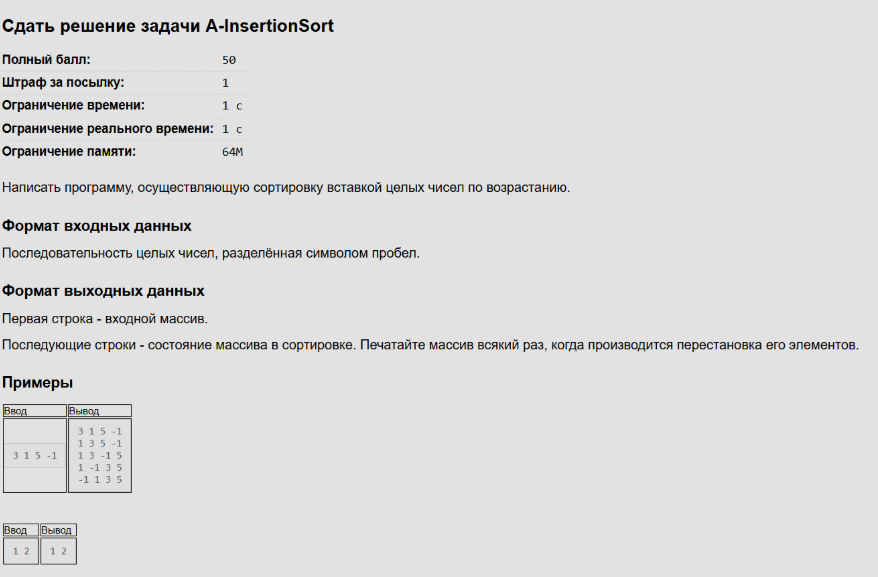

In [ ]:
#Сортировка вставкой: i-1 элемент отсортирован; i-й элемент сравниваем с предыдущими и проталкиваем куда надо
arr = list(map(int, input().split()))
print(*arr)
for i in range(1, len(arr)):
  temp = arr[i]
  j = i - 1
  flag = False
  while j >= 0 and temp < arr[j]:
    arr[j+1], arr[j] = arr[j], arr[j+1]
    j -= 1
    flag = True
    if flag:
      print(*arr)


9 2 4 2 9 5 -1 -8
2 9 4 2 9 5 -1 -8
2 4 9 2 9 5 -1 -8
2 4 2 9 9 5 -1 -8
2 2 4 9 9 5 -1 -8
2 2 4 9 5 9 -1 -8
2 2 4 5 9 9 -1 -8
2 2 4 5 9 -1 9 -8
2 2 4 5 -1 9 9 -8
2 2 4 -1 5 9 9 -8
2 2 -1 4 5 9 9 -8
2 -1 2 4 5 9 9 -8
-1 2 2 4 5 9 9 -8
-1 2 2 4 5 9 -8 9
-1 2 2 4 5 -8 9 9
-1 2 2 4 -8 5 9 9
-1 2 2 -8 4 5 9 9
-1 2 -8 2 4 5 9 9
-1 -8 2 2 4 5 9 9
-8 -1 2 2 4 5 9 9


#B
Написать программу, осуществляющую сортировку пузырьком введённых целых чисел по возрастанию.

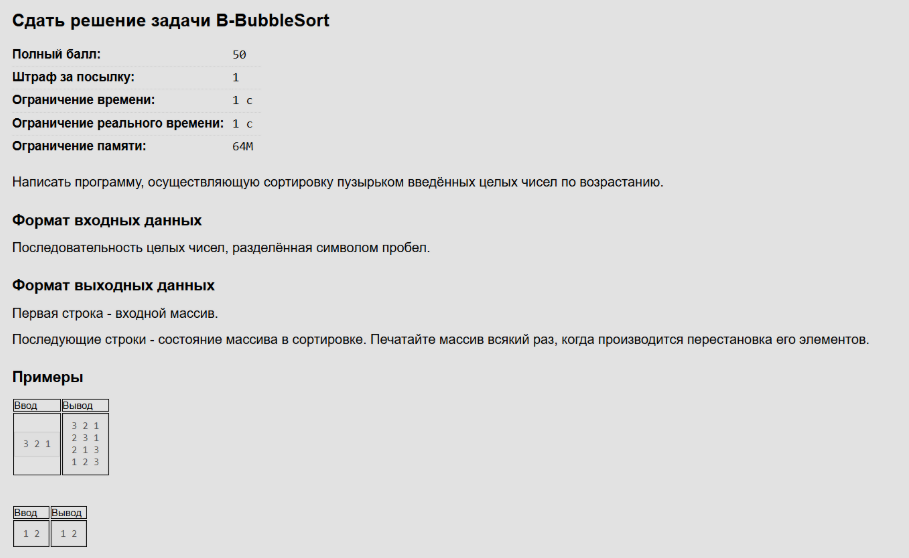

In [ ]:
#Сортировка пузырьком: i-й элемент сравниваем с i+1-м и проталкиваем куда его в конец
arr = list(map(int, input().split()))
print(*arr)
for i in range(len(arr)):
  for j in range(len(arr)-i-1):
    flag = False
    if arr[j] > arr[j+1]:
      arr[j], arr[j+1] = arr[j+1], arr[j]
      flag = True
    if flag == True:
      print(*arr)

3 2 1
3 2 1
2 3 1
2 1 3
1 2 3


#C
Написать программу, осуществляющую сортировку выбором по возрастанию для целых чисел.

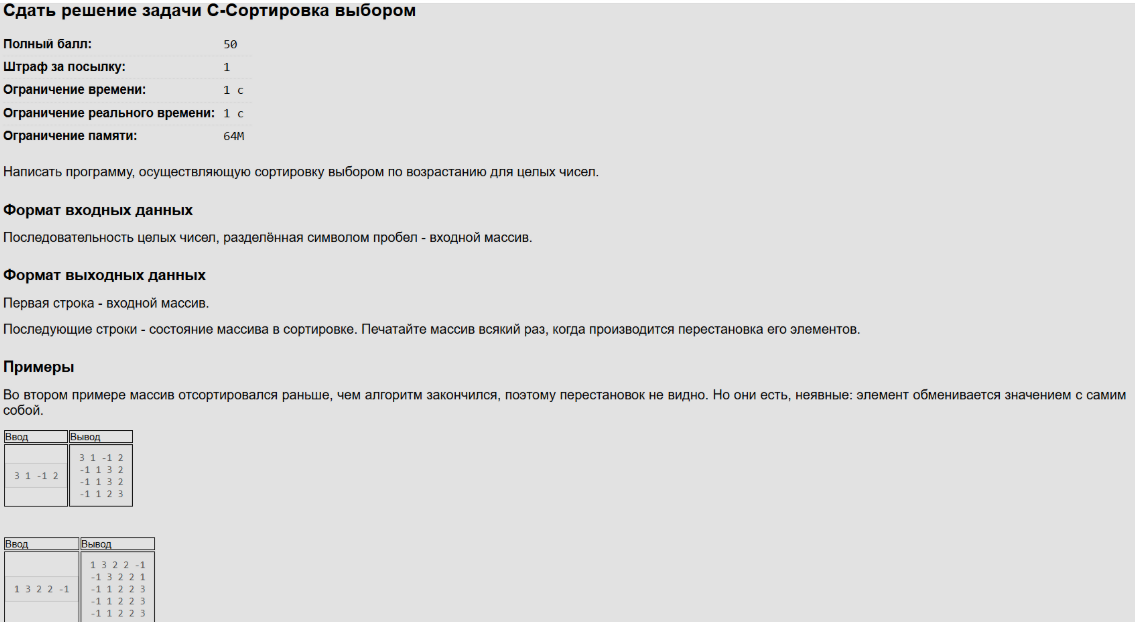

In [ ]:
arr = list(map(int, input().split()))
print(*arr)
for i in range(len(arr)-1):
  min_index = i
  for j in range(i+1, len(arr)):
    if arr[j] < arr[min_index]:
      min_index = j
  arr[i], arr[min_index] = arr[min_index], arr[i]
  print(*arr)


1 3 2 2 -1
1 3 2 2 -1
-1 3 2 2 1
-1 1 2 2 3
-1 1 2 2 3
-1 1 2 2 3


№D
В этой задаче необходимо реализовать сортировку подсчётом для массива десятичных цифр.

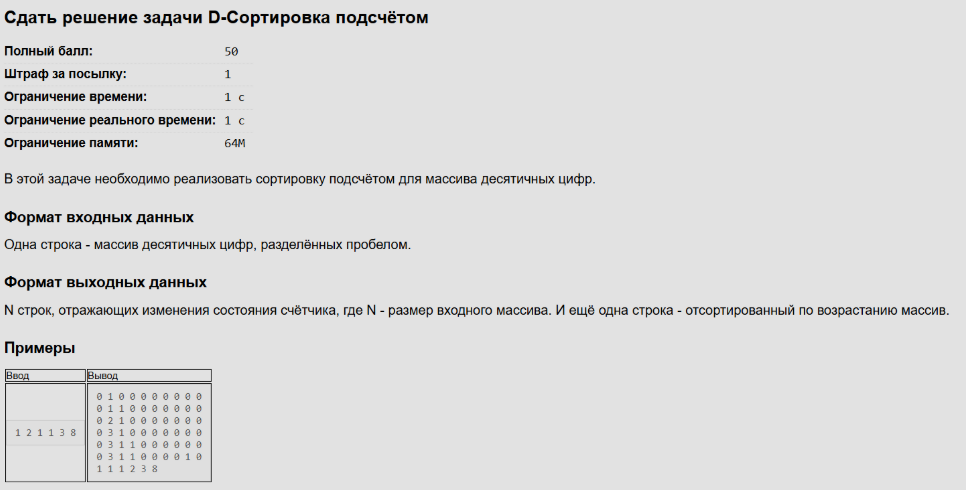

In [ ]:
arr = list(map(int, input().split()))
counts = list([0]*10)
for i in range(len(arr)):
  counts[arr[i]] += 1
  print(*counts)
sorted = []
for j in range(len(counts)):
  if counts[j] != 0:
    sorted.extend([j] * counts[j])
print(*sorted)



1 2 1 1 3 8
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 3, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 3, 1, 1, 0, 0, 0, 0, 1, 0]
1 1 1 2 3 8


#E
Написать программу, осуществляющую поразрядную сортировку введённых целых чисел в двоичной системе счисления по возрастанию. Внимание! Сначала необходимо считать все введённые числа в один список


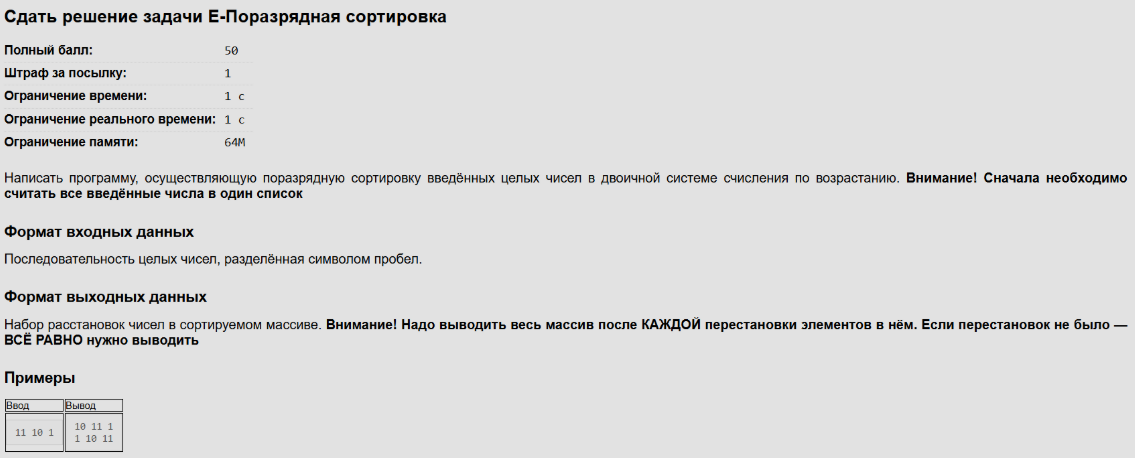

In [ ]:
arr = list(map(int, input().split()))
counts = list(list() for i in range(10))
x = 1

maximum = max(arr)
count = 0
while maximum != 0:
  maximum //= 10
  count += 1

while x < 10**count:
  for c in counts:
    c.clear()
  for elem in arr:
    counts[elem//x%10].append(elem)
  arr.clear()
  for elem in counts:
    arr.extend(elem)
  x *= 10
  print(*arr)



11 10 1
10 11 1
1 10 11


#F
В этой задаче необходимо отсортировать двумерный массив целых чисел, используя сортировку пузырьком.

Отсортированным считается массив, в котором отсортированы все строки по неубыванию, при этом последний элемент i-ой строки не больше, чем первый элемент i+1 строки.

Для этого напишите функцию bubble_sort2d(matrix, N, M) , совершающую описанную выше сортировку.

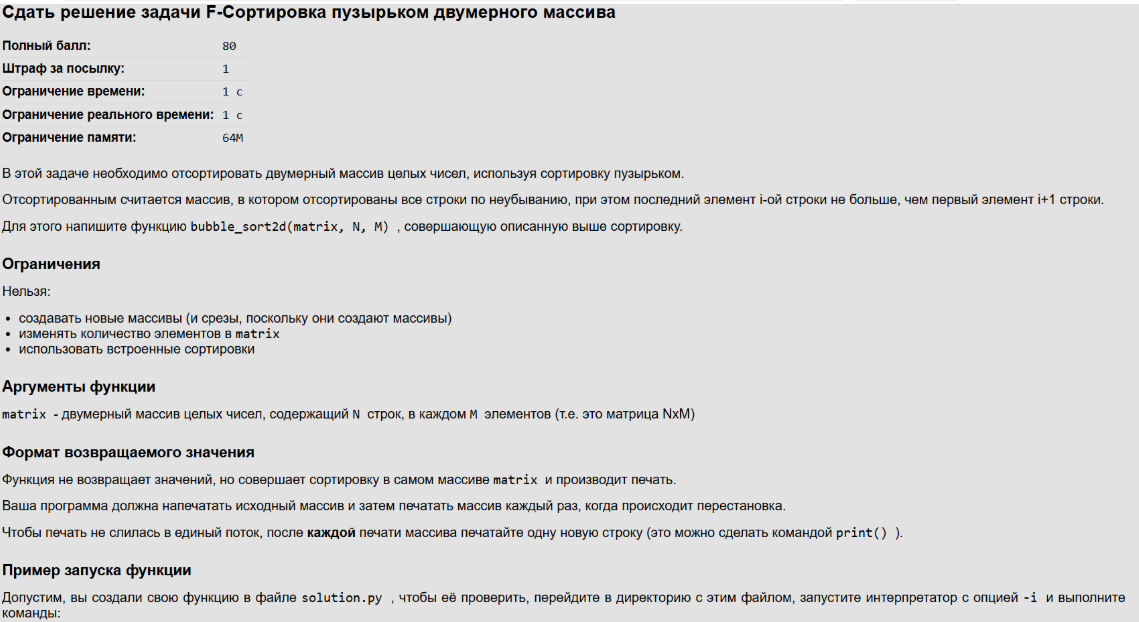

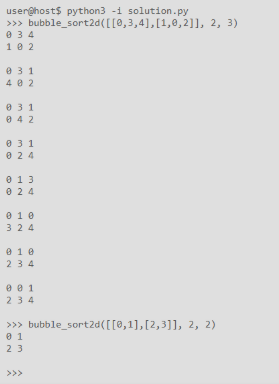

In [ ]:
def bubble_sort2d(matrix, N:int, M:int):
  for row in matrix:
    print(*row)
  print()
  total_elements = N * M
  for i in range (total_elements):
    for j in range (total_elements-1):
      row1, col1 = j // M, j % M
      row2, col2 = (j + 1) // M, (j + 1) % M
      if matrix[row1][col1] > matrix[row2][col2]:
        matrix[row1][col1], matrix[row2][col2] = matrix[row2][col2], matrix[row1][col1]
        for row in matrix:
          print(*row)
        print()


bubble_sort2d([[0, 3, 4], [1, 0, 2]], 2, 3)

0 3 4
1 0 2

0 3 1
4 0 2

0 3 1
0 4 2

0 3 1
0 2 4

0 1 3
0 2 4

0 1 0
3 2 4

0 1 0
2 3 4

0 0 1
2 3 4



#G
Дан список целых чисел. Отсортировать его по возрастанию, при этом оставить все нули на своих местах.

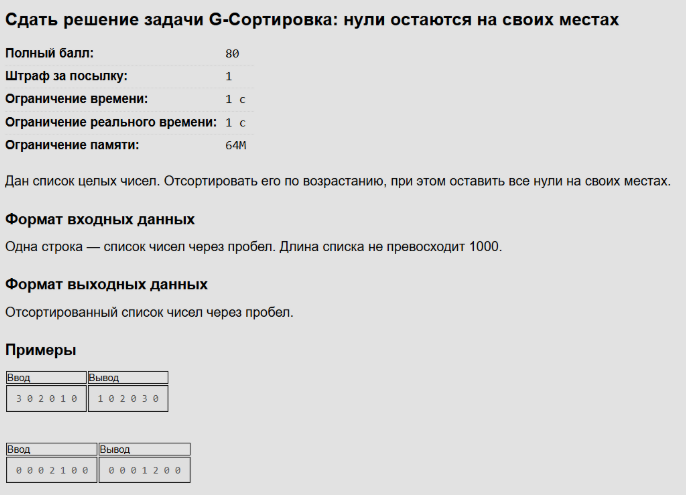

In [ ]:
arr = list(map(int, input().split()))
mew_arr = []
for i in range(len(arr)):
  if arr[i] != 0:
    mew_arr.append(arr[i])

def bubble_sort(array):
  for i in range(len(array)):
    for j in range(len(array)-i-1):
      if array[j] > array[j+1]:
        array[j], array[j+1] = array[j+1], array[j]
  return array

bubble_sort(mew_arr)

index = 0
for i in range(len(arr)):
  if arr[i] != 0:
    arr[i] = mew_arr[index]
    index += 1
print(*arr)



3 0 2 0 1 0
1 0 2 0 3 0


#H
Необходимо отсортировать набор дат в хронологическом порядке во возрастанию.

Дата состоит из дня, месяца, года и времени с точностью до минут.

Названия месяцев английские, с заглавной буквы.

Диапазон времени 00:00 - 23:59.

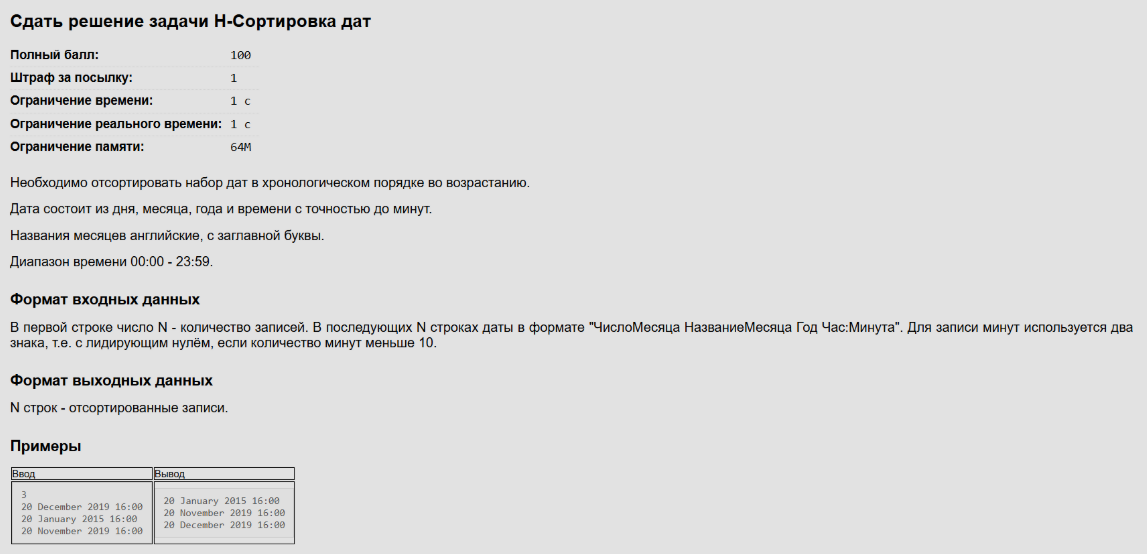

In [ ]:
n = int(input())
dates  = []
month_dict = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

for _ in range(n):
  data = input().split()
  time = data[3].split(':')
  day = int(data[0])
  month = month_dict[data[1]]
  year = int(data[2])
  hour = int(time[0])
  minute = int(time[1])
  dates.append([year, month, day, hour, minute])


for i in range(n):
    for j in range(n - i - 1):
        # Сравниваем по всем полям в порядке важности: год -> месяц -> день -> час -> минута
        if dates[j][0] > dates[j+1][0]:  # Год
            dates[j], dates[j+1] = dates[j+1], dates[j]
        elif dates[j][0] == dates[j+1][0]:
            if dates[j][1] > dates[j+1][1]:  # Месяц
                dates[j], dates[j+1] = dates[j+1], dates[j]
            elif dates[j][1] == dates[j+1][1]:
                if dates[j][2] > dates[j+1][2]:  # День
                    dates[j], dates[j+1] = dates[j+1], dates[j]
                elif dates[j][2] == dates[j+1][2]:
                    if dates[j][3] > dates[j+1][3]:  # Час
                        dates[j], dates[j+1] = dates[j+1], dates[j]
                    elif dates[j][3] == dates[j+1][3]:
                        if dates[j][4] > dates[j+1][4]:  # Минута
                            dates[j], dates[j+1] = dates[j+1], dates[j]


def get_key(d, value):
    for k, v in d.items():
        if v == value:
            return k

for date in dates:
  year, month_num, day, hour, minute = date
  month_name = [k for k, v in month_dict.items() if v == month_num][0]
  print("{0} {1} {2} {3}:{4:02d}".format(day, month_name, year, hour, minute)) #print(f"{day} {month_name} {year} {hour:02d}:{minute:02d}")



2
20 November 2019 16:33
65 December 2000 16:00
2000 12 65 16 0
2019 11 20 16 33


#I
При сортировке слиянием одна из важных частей программы - функция, выполняющая слияние двух отсортированных массивов в больший отсортированный массив.

В данной задаче Вам необходимо написать функцию merge(L, R) , где L, R -- два отсортированных по возрастанию списка. Причём, в контексте сортировки слияния, список элементов L расположен левее списка R .

В результате работы функция должна вернуть новый список, который содержит все элементы L, R . Все элементы нового списка должны быть отсортированы по возрастанию.

Внимание! В данной задаче необходимо реализовать только функцию! Ввод и вывод данных писать не нужно!

Так же обратите внимание, что название функции и число параметров должно строго соответствовать формату merge(L, R)

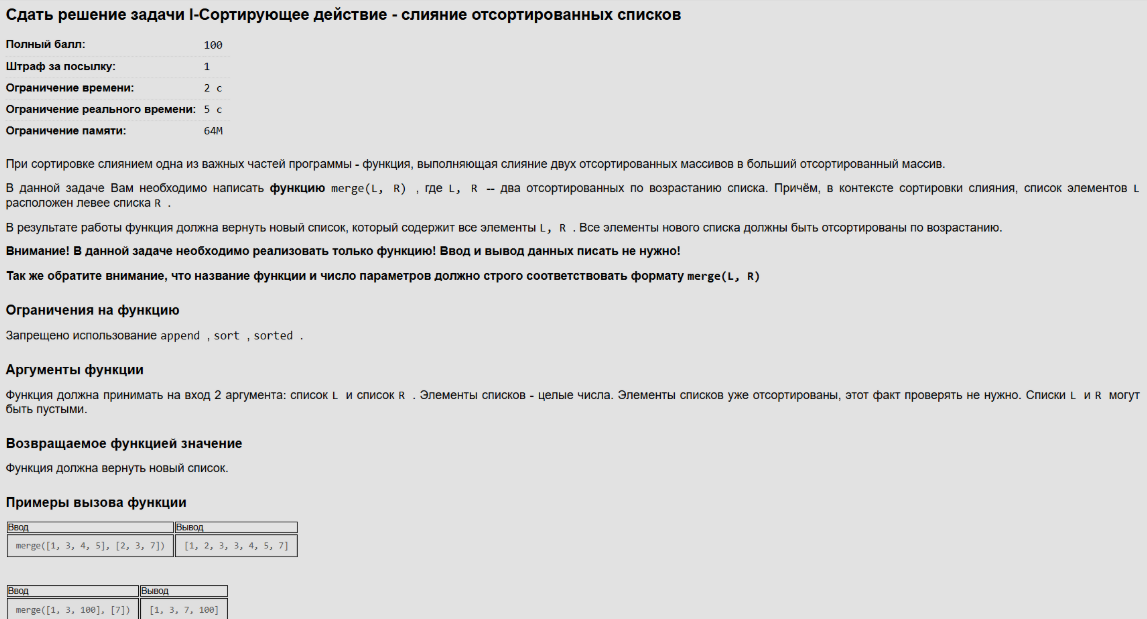

In [ ]:
def merge(L, R):
  result = []
  i = j = 0
  while i < len(L) and j < len(R):
    if L[i] <= R[j]:
      result.append(L[i])
      i += 1
    else:
      result.append(R[j])
      j += 1
  while i < len(L):
    result.append(L[i])
    i += 1
  while j < len(R):
    result.append(R[j])
    j += 1
  return result
Left = [1, 3, 4, 5]
Right = [2, 3, 7]
merge(Left, Right)
#but append could not be used, so

[1, 2, 3, 3, 4, 5, 7]

In [ ]:
def merge(L, R):
    total_length = len(L) + len(R)
    result = [0] * total_length
    i = j = k = 0

    while i < len(L) and j < len(R):
        if L[i] <= R[j]:
            result[k] = L[i]
            i += 1
        else:
            result[k] = R[j]
            j += 1
        k += 1

    while i < len(L):
        result[k] = L[i]
        i += 1
        k += 1

    while j < len(R):
        result[k] = R[j]
        j += 1
        k += 1

    return result

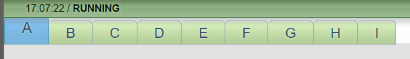